<a href="https://colab.research.google.com/github/herrickc9614/geneticAlgorithm_SynthData/blob/main/geneticAlgorithm_SynthData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

Import DataFrame from Kaggle

In [221]:
!pip install kagglehub
import kagglehub

#Anish Dev Edward
#https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset/data
path = kagglehub.dataset_download("anishdevedward/loan-approval-dataset")
df = pd.read_csv(f"{path}/loan_approval.csv")
df.drop_duplicates()
df.info()

Using Colab cache for faster access to the 'loan-approval-dataset' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [ ]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


Convert Boolean Values into Ints

In [ ]:
df["loan_approved"] = df["loan_approved"].astype(int)

Classify Collumns Between Input and Output

In [ ]:
X = df[['income', 'credit_score', 'loan_amount', 'years_employed', 'points']]
y = df[['loan_approved']]

Standardize Data

In [ ]:
#Scaled X for future use if needed
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Feature Selection

In [ ]:
# Perform feature selection using the SelectPercentile function
model_percent = SelectPercentile(score_func=f_classif, percentile=65)
X_new_percent = model_percent.fit_transform(X, np.ravel(y))

In [ ]:
# Get features selected by each function
filter_percent = model_percent.get_support()

# Get input feature names
features = np.array(X.columns)

In [ ]:
features[filter_percent]

array(['income', 'credit_score', 'points'], dtype=object)

In [ ]:
X = X[['income', 'credit_score', 'points']]

Divide the Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1/(1-0.1), random_state=124)

Replace TrainingSet With Synthetic Data

Logistic Regression:

In [ ]:
regModel = LogisticRegression()

In [ ]:
# Create tuning grid
params = {'penalty': [None, 'l1', 'l2'],
          'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000, 10000, 100000]}

# Initialize tuning grid and fit to training data
regTuning = GridSearchCV(regModel, params)
regTuning.fit(X_val, np.ravel(y_val))

print('Best estimator:', regTuning.best_estimator_)

Best estimator: LogisticRegression(max_iter=10, penalty=None)


In [ ]:
regModel.set_params(max_iter=10, penalty=None)
regModel.fit(X_train, y_train)
regModel.score(X_test, y_test)

1.0

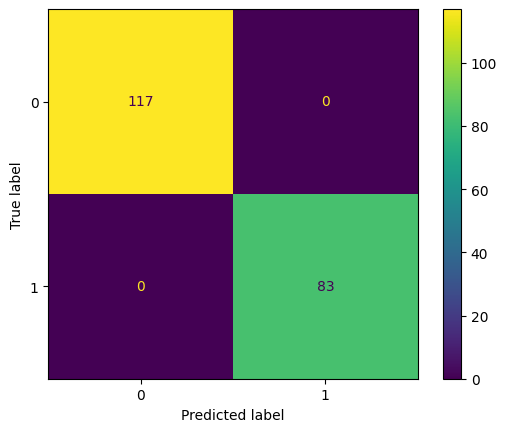

In [ ]:
y_pred = regModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("LR model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("LR model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("LR model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("LR model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

LR model accuracy: 1.0
LR model precision: 1.0
LR model recall: 1.0
LR model kappa: 1.0


Decision Tree Classifier:

In [ ]:
treeModel = DecisionTreeClassifier()

In [ ]:
# Create tuning grid
params = {'max_depth': [15, 16, 17, 18, 19, 20, 25],
          'min_samples_split': [10, 15, 20, 25, 30],
          'min_samples_leaf': [2, 3, 4, 5],
          'max_leaf_nodes': [70, 80, 90, 100]}

# Initialize tuning grid and fit to training data
treeTuning = GridSearchCV(treeModel, params)
treeTuning.fit(X_val, np.ravel(y_val))

print('Best estimator:', treeTuning.best_estimator_)

Best estimator: DecisionTreeClassifier(max_depth=15, max_leaf_nodes=70, min_samples_leaf=2,
                       min_samples_split=10)


In [ ]:
treeModel.set_params(max_depth=15, max_leaf_nodes=70, min_samples_leaf=2,
                       min_samples_split=10)
treeModel.fit(X_train, y_train)
treeModel.score(X_test, y_test)

1.0

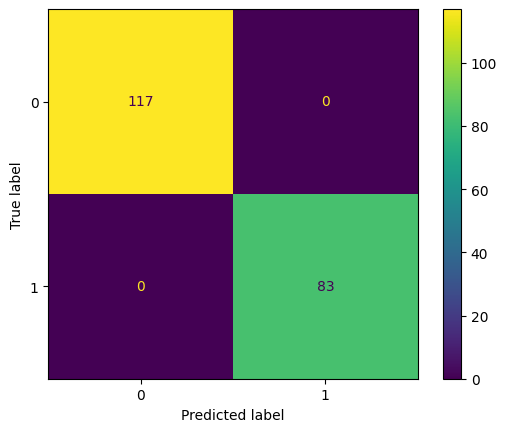

In [ ]:
y_pred = treeModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("Tree model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Tree model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("Tree model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("Tree model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

Tree model accuracy: 1.0
Tree model precision: 1.0
Tree model recall: 1.0
Tree model kappa: 1.0


SVC:

In [ ]:
svcModel = SVC()

In [ ]:
# Create tuning grid
params = {'max_iter': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000, 5000, 10000],
          'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Initialize tuning grid and fit to training data
svcTuning = GridSearchCV(svcModel, params)
svcTuning.fit(X_val, np.ravel(y_val))

print('Best estimator:', svcTuning.best_estimator_)

Best estimator: SVC(C=5, max_iter=60)


In [ ]:
svcModel.set_params(C=5, max_iter=50)
svcModel.fit(X_train, y_train)
svcModel.score(X_test, y_test)

1.0

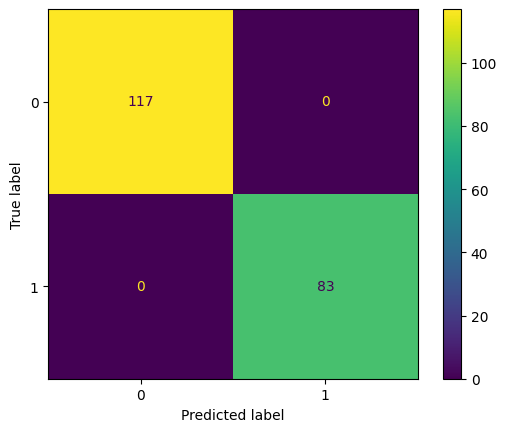

In [ ]:
y_pred = svcModel.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print("SVC model accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVC model precision:", metrics.precision_score(y_test, y_pred, average='micro'))
print("SVC model recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("SVC model kappa:", metrics.cohen_kappa_score(y_test, y_pred))

SVC model accuracy: 1.0
SVC model precision: 1.0
SVC model recall: 1.0
SVC model kappa: 1.0


Comparing the models

In [ ]:
kf = KFold(n_splits=10, random_state=19, shuffle=True)

In [ ]:
regResults = cross_validate(regModel, X_train, np.ravel(y_train), cv=kf)
regScores = regResults['test_score']

print('LR scores:', regScores.round(3))
print('LR Mean:', regScores.mean().round(3))
print('LR SD:', regScores.std().round(3))

LR scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
LR Mean: 1.0
LR SD: 0.0


In [ ]:
treeResults = cross_validate(treeModel, X_train, np.ravel(y_train), cv=kf)
treeScores = treeResults['test_score']

print('tree scores:', treeScores.round(3))
print('tree Mean:', treeScores.mean().round(3))
print('tree SD:', treeScores.std().round(3))

tree scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
tree Mean: 1.0
tree SD: 0.0


In [ ]:
svcResults = cross_validate(svcModel, X_train, np.ravel(y_train), cv=kf)
svcScores = svcResults['test_score']

print('svc scores:', svcScores.round(3))
print('svc Mean:', svcScores.mean().round(3))
print('svc SD:', svcScores.std().round(3))

svc scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
svc Mean: 1.0
svc SD: 0.0
